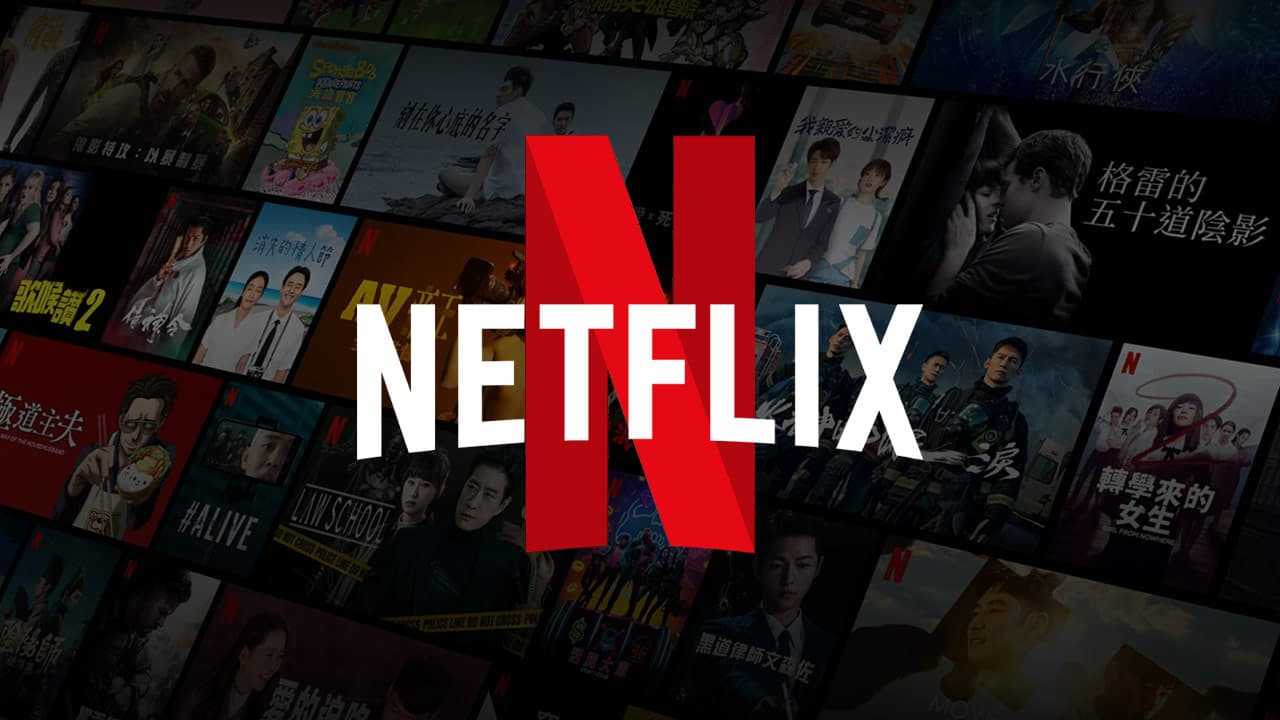

In [14]:
# for loading Netflix's image logo in this jupyter notebook:
from IPython.display import Image
Image("netflix_Eda_project_logo.jpg")


# EXPLORATORY DATA ANALYSIS (EDA) USING SQL:

In [15]:
# Preview of the dataset:
import pandas as pd
df=pd.read_csv("netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="",
    database="all_netflix_titles"
)

cursor = connection.cursor()


# Q1) WHAT ARE THE TOTAL NO. OF RECORDS:

In [18]:
cursor.execute("SELECT COUNT(*) AS total_records FROM netflix_titles")
data = cursor.fetchall()

print("Total no. of records in the dataset = ",data[0][0])

Total no. of records in the dataset =  6235


# Q2) TOTAL NO. OF MOVIES AND TV SHOWS:

In [19]:
cursor.execute("SELECT type, COUNT(*) FROM netflix_titles WHERE type!='type' GROUP BY type")
data = cursor.fetchall()

print("These many movies and tv-shows (respectively) exist in the dataset : ")
for i in data:
    if(i[0]=="Movie"):
        print(i[1],"movies")
    else:
        print(i[1],"tv shows")

These many movies and tv-shows (respectively) exist in the dataset : 
4265 movies
1969 tv shows


# Q3) NUMBER OF RECORDS WITH MISSING VALUES:

In [20]:

cursor.execute("""SELECT COUNT(*) FROM netflix_titles 
WHERE director IS NULL 
OR director = '' """)

missing_directors = cursor.fetchone()[0]
print(f" Missing Directors: {missing_directors}")

 Missing Directors: 1969


In [21]:

cursor.execute("""SELECT COUNT(*) FROM netflix_titles 
WHERE cast IS NULL 
OR cast = '' """)

missing_cast = cursor.fetchone()[0]
print(f" Missing Cast: {missing_cast}")

 Missing Cast: 570


In [22]:

cursor.execute("""SELECT COUNT(*) FROM netflix_titles 
WHERE date_added IS NULL 
OR date_added = '' """)

missing_dates = cursor.fetchone()[0]
print(f" Missing Dates: {missing_dates}")

 Missing Dates: 11


In [23]:

cursor.execute("""SELECT COUNT(*) FROM netflix_titles 
WHERE country IS NULL 
OR country = '' """)

missing_countries = cursor.fetchone()[0]
print(f" Missing Countries: {missing_countries}")

 Missing Countries: 476


In [24]:

cursor.execute("""SELECT COUNT(*) FROM netflix_titles 
WHERE rating IS NULL 
OR rating = '' """)

missing_ratings = cursor.fetchone()[0]
print(f" Missing Ratings: {missing_ratings}")

 Missing Ratings: 10


# Q4) WHICH COUNTRIES PRODUCE THE MOST CONTENT:

In [25]:
cursor.execute("""
    SELECT country, COUNT(*) AS total
    FROM netflix_titles
    WHERE country IS NOT NULL AND country <> ''
    GROUP BY country
    ORDER BY total DESC
    LIMIT 10
""")
top_countries = cursor.fetchall()

print(" Top 10 Countries:")
for country, total in top_countries:
    print(f"{country} ➝ {total}")


 Top 10 Countries:
United States ➝ 2032
India ➝ 777
United Kingdom ➝ 348
Japan ➝ 176
Canada ➝ 141
South Korea ➝ 136
Spain ➝ 117
France ➝ 90
Mexico ➝ 83
Turkey ➝ 79


# Q5) IN WHICH YEARS MOST CONTENT WAS ADDED:

In [26]:
cursor.execute("""
    SELECT release_year, COUNT(*) AS total
    FROM netflix_titles
    GROUP BY release_year
    ORDER BY total DESC
    LIMIT 10
""")
years = cursor.fetchall()

print(" Top 10 Years:")
for year, total in years:
    print(f"{year} ➝ {total}")

 Top 10 Years:
2018 ➝ 1063
2017 ➝ 959
2019 ➝ 843
2016 ➝ 830
2015 ➝ 517
2014 ➝ 288
2013 ➝ 237
2012 ➝ 183
2010 ➝ 149
2011 ➝ 136


# Q6) WHICH RATINGS ARE GIVEN MOST OFTENLY?

In [27]:
cursor.execute("""
    SELECT rating, COUNT(*) AS total
    FROM netflix_titles
    WHERE rating IS NOT NULL
    GROUP BY rating
    ORDER BY total DESC
""")
ratings = cursor.fetchall()

print(" Most Common Ratings:")
for rating, total in ratings:
    print(f"{rating} ➝ {total}")

 Most Common Ratings:
TV-MA ➝ 2027
TV-14 ➝ 1698
TV-PG ➝ 701
R ➝ 508
PG-13 ➝ 286
NR ➝ 218
PG ➝ 184
TV-Y7 ➝ 169
TV-G ➝ 149
TV-Y ➝ 143
TV-Y7-FV ➝ 95
G ➝ 37
 ➝ 10
UR ➝ 7
NC-17 ➝ 2
rating ➝ 1


# Q7) WHAT ARE THE TOP 10 GENRES:

In [28]:
cursor.execute("""
    SELECT listed_in, COUNT(*) AS total
    FROM netflix_titles
    GROUP BY listed_in
    ORDER BY total DESC
    LIMIT 10
""")
genres = cursor.fetchall()

print(" Top 10 Genres:")
for genre, total in genres:
    print(f"{genre} ➝ {total}")

 Top 10 Genres:
Documentaries ➝ 299
Stand-Up Comedy ➝ 273
Dramas, International Movies ➝ 248
Dramas, Independent Movies, International Movies ➝ 186
Comedies, Dramas, International Movies ➝ 174
Kids' TV ➝ 159
Documentaries, International Movies ➝ 150
Children & Family Movies, Comedies ➝ 129
Children & Family Movies ➝ 120
Comedies, International Movies ➝ 120


# Q8) WHAT ARE THE TOP 5 MOVIES WITH THE LONGEST DURATION:

In [29]:
cursor.execute("""
    SELECT title, duration
    FROM netflix_titles
    WHERE type = 'Movie'
    ORDER BY CAST(REPLACE(duration, ' min', '') AS UNSIGNED) DESC
    LIMIT 5
""")
longest_movies = cursor.fetchall()

print(" Top 5 Longest Movies:")
for title, duration in longest_movies:
    print(f"{title} ➝ {duration}")

 Top 5 Longest Movies:
Black Mirror: Bandersnatch ➝ 312 min
Sangam ➝ 228 min
Lagaan ➝ 224 min
Jodhaa Akbar ➝ 214 min
The Irishman ➝ 209 min


# Q9) WHO ARE THE TOP-10 DIRECTORS:

In [30]:
cursor.execute("""
    SELECT director, COUNT(*) AS total
    FROM netflix_titles
    WHERE director IS NOT NULL AND director <> ''
    GROUP BY director
    ORDER BY total DESC
    LIMIT 10
""")
top_directors = cursor.fetchall()

print(" Top 10 Directors:")
for director, total in top_directors:
    print(f"{director} ➝ {total}")

 Top 10 Directors:
Raúl Campos, Jan Suter ➝ 18
Marcus Raboy ➝ 14
Jay Karas ➝ 13
Jay Chapman ➝ 12
Martin Scorsese ➝ 9
Steven Spielberg ➝ 9
Johnnie To ➝ 8
David Dhawan ➝ 8
Lance Bangs ➝ 8
Quentin Tarantino ➝ 7


# Q10) WHAT IS THE YEARLY TREND?

In [31]:
cursor.execute("""
    SELECT YEAR(STR_TO_DATE(date_added, '%M %e, %Y')) AS added_year,
           COUNT(*) AS total
    FROM netflix_titles
    WHERE date_added IS NOT NULL
    GROUP BY added_year
    ORDER BY added_year
""")
added_years = cursor.fetchall()

print(" Content Added Per Year:")
for year, total in added_years:
    if(year!="None"):
        print(f"{year} ➝ {total}")

 Content Added Per Year:
None ➝ 12
2008 ➝ 2
2009 ➝ 2
2010 ➝ 1
2011 ➝ 13
2012 ➝ 7
2013 ➝ 12
2014 ➝ 25
2015 ➝ 90
2016 ➝ 456
2017 ➝ 1300
2018 ➝ 1782
2019 ➝ 2349
2020 ➝ 184



---

##  **Business Storytelling: Netflix Content Strategy Insights**

>  *Dataset Size: 6,235 records (Movies + TV Shows)*

### 1. **Content Type Overview**

From the total content:

* **Movies:** 4,265
* **TV Shows:** 1,969

 **Insight:**
Netflix is primarily a **Movie-dominated platform**, with **~68%** of its catalog being movies. However, the increasing popularity of TV shows (series, miniseries, etc.) reflects a **growing trend in long-form storytelling** and binge-worthy content.

 **Business Action:**
Netflix could balance its catalog by investing more in **TV series and episodic content**, especially in regions where binge-watching behavior is high.

---

### 2. **Geographic Distribution**

Top producing countries:

* 🇺🇸 **USA (2032)** titles
* 🇮🇳 **India (777)** titles
* 🇬🇧 **UK (348)** titles
* 🇯🇵 Japan, 🇨🇦 Canada, 🇰🇷 South Korea also rank in top 10.

 **Insight:**
The US dominates content production on Netflix. But there’s a **strong international presence** led by India, UK, and Asia-Pacific regions.

 **Business Action:**
To increase **global market share**, Netflix should **localize content more aggressively in emerging markets** like India and Korea where content growth is already strong.

---

### 3. **Yearly Trends**

* Most content was released in:

  * 2018 → 1,063 titles
  * 2017 → 959 titles
  * 2019 → 843 titles
* Steady growth from 2014 onwards, peaking around 2018–2019.

 **Insight:**
Netflix experienced a **content boom between 2017–2019**, which correlates with its aggressive expansion strategy in global markets.

 **Business Action:**
This historical trend suggests that **periods of content expansion match subscription growth**. Investing again in high-volume content production could reignite growth in stagnant markets.

---

### 4. **Ratings Distribution**

* **Top Ratings:**

  * TV-MA (2027 titles)
  * TV-14 (1698 titles)
  * TV-PG (701 titles)

 **Insight:**
Most Netflix content targets **adult and mature audiences**. Only a small portion is kids/family content.

 **Business Action:**
To **capture family segments**, Netflix could strategically **increase PG and Kids content** while continuing its strong TV-MA pipeline for adult subscribers.

---

### 5. **Genre Distribution**

* Top genres:

  *  Documentaries (299)
  *  Stand-Up Comedy (273)
  *  Dramas & International Movies (248+)

 **Insight:**
Netflix’s content library is heavily invested in **Documentaries, Stand-Up, and Dramas** — genres that perform well with engaged, repeat viewers.

 **Business Action:**
Expand **documentary and international drama production**, and explore **under-represented genres** to diversify audience reach.

---

### 6. **Top 5 Longest Movies**

* *Black Mirror: Bandersnatch* – 312 min
* *Sangam* – 228 min
* *Lagaan* – 224 min
* *Jodhaa Akbar* – 214 min
* *The Irishman* – 209 min

 **Insight:**
Long-duration movies are largely **Indian and International historical epics**, indicating **a niche but loyal audience base** for extended storytelling.

 **Business Action:**
Netflix could leverage long-duration content as **event experiences** — marketing them like cinematic releases to attract premium subscribers.

---

### 7. **Top 10 Directors**

* Leading creators: Raúl Campos & Jan Suter (18), Marcus Raboy (14), Jay Karas (13), Martin Scorsese (9) etc.

 **Insight:**
Netflix has built **strong partnerships with specific creators**. These directors contribute a significant share of total titles.

 **Business Action:**
Continue nurturing **exclusive creator partnerships** — it’s an effective way to secure unique, consistent content for subscribers.

---

### 8. **Content Addition Over Years (date_added trend)**

* Sharp increase after 2016, peaking in **2018 (1782)** and **2019 (2349)** additions.
* Before 2014, content addition was negligible.

 **Insight:**
Netflix shifted from a **US-based streaming service** to a **global content powerhouse** post-2016. This was a **strategic inflection point**.

 **Business Action:**
Understanding this historical growth can help Netflix **plan its next major expansion wave**, potentially focusing on new content hubs (e.g., Southeast Asia, Africa).

---

##  **Executive Summary — Business Impact**

| Area                  | Key Insight                    | Recommended Action                   |
| --------------------- | ------------------------------ | ------------------------------------ |
| Content Type          | Movies dominate (68%)          | Increase TV show investment          |
| Geography             | US leads, India is strong      | Localize content in emerging markets |
| Time Trend            | Peak content growth: 2017–2019 | Repeat expansion strategy            |
| Ratings               | TV-MA dominates                | Diversify toward family & kids       |
| Genres                | Docs & Dramas dominate         | Expand under-represented genres      |
| Duration              | Long movies = niche audience   | Market as “event content”            |
| Directors             | Key creator partnerships       | Deepen exclusive deals               |
| Yearly Addition Trend | Explosive post-2016 growth     | Plan next expansion strategically    |

---

##  Final Storytelling Question to Stakeholders:

> “Given that Netflix’s content catalog is heavily movie-focused, US-dominated, and adult-rated, with explosive growth between 2017–2019 — **how can we strategically rebalance our content investments across geographies, genres, and audience segments to maximize global reach and engagement in the next expansion phase?**”

---


In [32]:
# CLOSE THE CONNECTION:

cursor.close()
connection.close()

print("Connection to MySQL successfully closed!")

Connection to MySQL successfully closed!


## END OF THE NOTEBOOK


## Please feel free to contact me. 

 Here are my contact details:
  - **Name:** _Om Satyawan Pathak_
  - **Email:** _omsatyawanpathakwebdevelopment@gmail.com_

